## Spring 2021 Data Bootcamp Midterm Project


### Daniel Abboudi

### Carlisle Catacutan

### Garima Chaudhary

## To start our project we imported packages and read-in the csv file. To better understand the data we read it in as a dataframe. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/catac/Desktop/Spring 2021/Data Bootcamp/DB_MidtermSampleData_Mar21.csv'

In [7]:
df = pd.read_csv(path)
df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,4.849139e-01,1.406462e+00
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455,6.467172e-07,6.981965e-07
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,3.127633e+01,2.168564e+01
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.103364,3.428746e+00,4.043797e-03
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.189915,4.131975e-05,1.567777e-03
...,...,...,...,...,...,...,...,...,...
2379029,International Business Machines Corporation,Information Technology,2015-09,empty,Northern Europe,male,981.675002,3.283342e+01,2.577147e+01
2379030,IQVIA,Information Technology,2018-07,empty,South-Eastern Asia,male,47.651149,1.246570e+00,5.287461e-01
2379031,"Delta Air Lines, Inc.",Industrials,2016-10,administrative,Northern Africa,female,0.000000,0.000000e+00,0.000000e+00
2379032,"HCA Healthcare, Inc.",Health Care,2017-05,empty,Northern Europe,male,19.443301,6.653489e-01,5.603069e-01


## We then cleaned up the data by replacing the empty fields.

In [8]:
# Treat 'empty' fields as NaN
df = df.replace('empty',np.NaN)

## We were interested in the companies listed in the dataframe so we listed them out.

In [9]:
df['company'].value_counts().index

Index(['Hewlett Packard Enterprise Company', 'Intel Corporation',
       'JPMorgan Chase', 'Verizon Communications Inc.', 'Coca-Cola Company',
       'General Electric Company', 'Procter & Gamble Co', 'Walmart Inc',
       'Omnicom Group Inc', 'Johnson & Johnson', 'Siemens AG',
       'Amazon.com, Inc.', 'Alphabet Inc.', 'MICROSOFT CORPORATION',
       'PepsiCo, Inc.', 'International Business Machines Corporation',
       'Oracle Corporation', 'Facebook Inc', 'Accenture PLC', 'Novartis AG',
       'Dell Technologies Inc', 'Barclays PLC', 'Vodafone Group PLC', 'AT&T',
       'Volkswagen AG', 'Apple, Inc.', 'Walt Disney Company', 'Morgan Stanley',
       'Pfizer Inc', 'Orange SA', 'Ford Motor Company',
       'CVS Health Corporation', 'Honeywell International Inc', 'ABB Ltd',
       'Tata Group', 'GENERAL MOTORS COMPANY', 'Unilever NV', 'Nestle SA',
       'Staples Inc.', 'United Technologies Corporation', 'WPP PLC',
       'Abbott Laboratories', 'Roche Holding AG', 'Cisco Systems, Inc.'

## Then we checked each column of data to see what type of data we were working with.

In [10]:
df.dtypes

company          object
sector           object
month            object
job_category     object
region           object
gender           object
count           float64
inflow          float64
outflow         float64
dtype: object

## We first looked at the geographical breakdown for each gender.

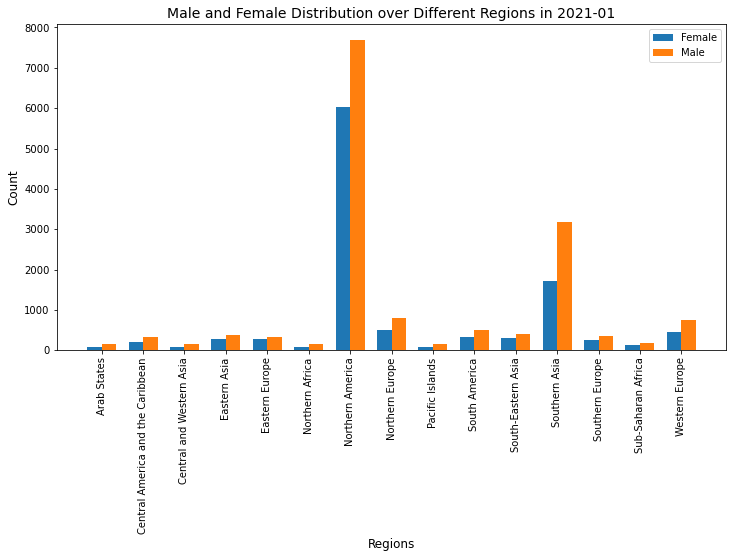

In [11]:
recent_month = df['month'].max()
recent_month

df_female = df.loc[(df['gender'] == 'female') & 
                   (df['month'] == recent_month), :]

df_male = df.loc[(df['gender'] == 'male') &
                 (df['month'] == recent_month), :]
region_female = df_female.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

region_male = df_male.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

n = np.arange(len(region_female['region'])) # the label locations
width = 0.35  # the width of the bars
upper_limit = max(region_female['count'].max(), region_male['count'].max())+1000 # max limit of y axis
label = list(region_female['region'])

f = list(region_female['count'])
m = list(region_male['count'])


# Graph
fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(n - width/2, f, width, label='Female')
rects2 = ax.bar(n + width/2, m, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', size= 12)
ax.set_xlabel('Regions', size= 12)
ax.set_title('Male and Female Distribution over Different Regions in '+ recent_month, size=14)
ax.set_xticks(n)
ax.set_xticklabels(label)
plt.xticks(rotation=90)

ax.legend()

## Interesting! It seems that most of our data is concentrated in North America. It is also noteworthy that there are more male employees than female employees in every region.

## With this in mind, we wanted to pick a company that would could look in to, but our approach to developing a set of code was to build in a way that enabled us to change the company name and sector.

In [12]:
# Define Company
company = 'MICROSOFT CORPORATION'

# Define Sector
sector = 'Information Technology'

## So we started by filtering the dataframe for the company and sector we were interested in exploring.

In [13]:
# Pull company
com = df.loc[df['company']==company,:]
com

,company,sector,month,job_category,region,gender,count,inflow,outflow
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,31.276326,21.685644
15,MICROSOFT CORPORATION,Information Technology,2013-10,engineer,Northern Africa,male,977.908116,17.548727,1.952721
79,MICROSOFT CORPORATION,Information Technology,2013-10,sales,Central and Western Asia,female,249.034021,2.181012,1.137052
121,MICROSOFT CORPORATION,Information Technology,2013-10,management,Central America and the Caribbean,male,1209.558946,6.891029,5.673412
291,MICROSOFT CORPORATION,Information Technology,2013-10,administrative,Arab States,female,47.846496,1.551804,2.141531
...,...,...,...,...,...,...,...,...,...
2378963,MICROSOFT CORPORATION,Information Technology,2017-08,NaN,Arab States,female,149.627363,1.672687,2.851684
2379005,MICROSOFT CORPORATION,Information Technology,2019-04,administrative,NaN,female,0.686305,0.000208,0.000117
2379007,MICROSOFT CORPORATION,Information Technology,2019-06,administrative,NaN,female,0.686679,0.000325,0.000239
2379012,MICROSOFT CORPORATION,Information Technology,2017-09,NaN,South-Eastern Asia,male,404.693496,13.557815,13.175961


## Then we looked into some simple questions about the company makeup.

In [14]:
# How many employees does the company have?
com.loc[com['month']==com['month'].max(),'count'].sum()

439855.08444770006

In [15]:
# How many males?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='male'),'count'].sum()

281009.5853553871

In [16]:
# How many females?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='female'),'count'].sum()

158845.49909231294

## Then we created another dataframe to look deeping into the types of roles that each gender had within the company.

In [17]:
# What positions do com employees fulfill? Need to sum by 'job_category'
com2 = com.loc[com['month']==com['month'].max(),:]
com2 = com2.groupby(['job_category','gender']).agg({'count':'sum'})
com2 = com2.reset_index()

# Split the data into two groups by gender
male = com2.loc[com2['gender']=='male',:].set_index('job_category')
female = com2.loc[com2['gender']=='female',:].set_index('job_category')
female

,gender,count
job_category,,
administrative,female,4919.452199
engineer,female,56931.897171
finance,female,8290.367964
management,female,37982.177935
marketing,female,9642.722500
sales,female,20223.363519
scientist,female,4762.938735
technician,female,5902.232550


In [18]:
male

,gender,count
job_category,,
administrative,male,4475.086883
engineer,male,127441.503137
finance,male,6281.660796
management,male,66348.732761
marketing,male,11675.654514
sales,male,31940.603128
scientist,male,5880.197481
technician,male,10573.823638


## With this data in hand, we wanted to see how the company compared to other companies in the same sector. So we refiltered the original data.

In [19]:
# Pull Sector data and Remove company from this data to compare rest of sector to company
sector_df = df.loc[(df['sector']==sector) & (df['company']!=company) & (df['month']==df['month'].max()),:]
sector_df

,company,sector,month,job_category,region,gender,count,inflow,outflow
570187,"Apple, Inc.",Information Technology,2021-01,management,Northern Africa,female,206.031624,1.948740,0.619299
570188,Accenture PLC,Information Technology,2021-01,sales,Southern Europe,male,421.047914,7.184832,4.669169
570197,DXC Technology Co,Information Technology,2021-01,administrative,Northern America,female,236.415678,7.113997,4.296831
570200,Wipro Ltd,Information Technology,2021-01,finance,Arab States,female,25.474374,0.285405,0.091720
570203,Infosys Ltd,Information Technology,2021-01,marketing,Sub-Saharan Africa,male,15.176747,0.153891,0.062636
...,...,...,...,...,...,...,...,...,...
2374800,"Apple, Inc.",Information Technology,2021-01,NaN,Arab States,male,152.872322,2.132169,0.798659
2377510,HP Inc,Information Technology,2021-01,NaN,Southern Asia,female,280.089987,4.371611,3.434548
2377789,Wipro Ltd,Information Technology,2021-01,administrative,Central and Western Asia,male,1.101725,0.006300,0.005351
2378153,"Apple, Inc.",Information Technology,2021-01,NaN,Sub-Saharan Africa,male,24.528945,0.333649,0.065184


In [20]:
sector_df2 = sector_df.groupby(['job_category','gender']).agg({'count':'sum'})
sector_df2 = sector_df2.reset_index()

# Split the data into two groups by gender
male_sector = sector_df2.loc[sector_df2['gender']=='male',:].set_index('job_category')
female_sector = sector_df2.loc[sector_df2['gender']=='female',:].set_index('job_category')
female_sector

,gender,count
job_category,,
administrative,female,4.901621e+04
engineer,female,1.010572e+06
finance,female,8.304000e+04
management,female,4.429822e+05
marketing,female,4.132721e+04
sales,female,1.363506e+05
scientist,female,3.152170e+04
technician,female,3.239551e+04


In [21]:
male_sector

,gender,count
job_category,,
administrative,male,4.111243e+04
engineer,male,1.956867e+06
finance,male,9.163431e+04
management,male,7.924661e+05
marketing,male,5.059552e+04
sales,male,2.523236e+05
scientist,male,2.791048e+04
technician,male,8.164888e+04


## We used the data to build charts that reflected the company job breakdown by gender, and then did the same for the sector.

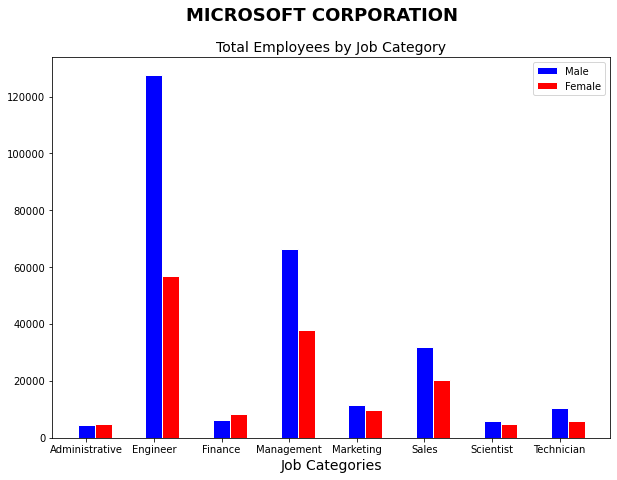

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male['count']
bars2 = female['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male.reset_index().index,male.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## We see that for Microsoft, the most popular job is Engineer and that males outnumber females by a large margin. In marketing, there are much fewer employees, but this job seems to be more evenly split between males and females.

## So what does the rest of the sector look like? Let's see!

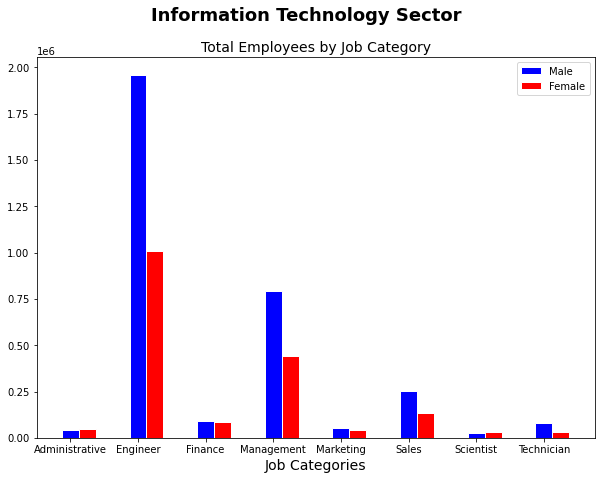

In [23]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male_sector['count']
bars2 = female_sector['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle((sector+' Sector'),size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male_sector.reset_index().index,male_sector.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## The graphs look fairly similar! Once again, Engineer is the most popular job, and the males outnumber females in this role. Management, marketing and sales for the sector look proportionally similar to Microsoft. This suggests the job breakdown for Microsoft is similar to the industry as a whole.

## The next thing we wanted to explore was the spread in the percentage of male and female employees, for both the company and the sector as a whole. So we took a similar approach as above, creating dataframes for the company and then sector. 

In [24]:
# Company Hiring Over Time
com_month = com.groupby(['month','gender'])[['count']].sum().reset_index()
com_month

# Find spread between % of employees as male vs female
com_month['percentage'] = 0
com_month['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
for i in range(len(com_month)):
    com_month.loc[i,'percentage'] = com_month.loc[i,'count']/com_month.loc[com_month['month']==com_month.loc[i,'month'],'count'].sum()
    com_month.loc[i,'spread'] = com_month.loc[i,'percentage']-(1-com_month.loc[i,'percentage'])
com_month

,month,gender,count,percentage,spread
0,2012-01,female,102376.380712,0.341496,-0.317009
1,2012-01,male,197411.944975,0.658504,0.317009
2,2012-02,female,101114.763900,0.341446,-0.317109
3,2012-02,male,195022.479654,0.658554,0.317109
4,2012-03,female,101656.914626,0.341432,-0.317136
...,...,...,...,...,...
213,2020-11,male,279722.880288,0.639089,0.278177
214,2020-12,female,158098.829456,0.360833,-0.278335
215,2020-12,male,280051.259254,0.639167,0.278335
216,2021-01,female,158845.499092,0.361131,-0.277737


## Note that we are exploring the spread over time. Good news is we have almost a decade of data!

In [25]:
male = com_month.loc[com_month['gender']=='male',:]
female = com_month.loc[com_month['gender']=='female',:]
female

,month,gender,count,percentage,spread
0,2012-01,female,102376.380712,0.341496,-0.317009
2,2012-02,female,101114.763900,0.341446,-0.317109
4,2012-03,female,101656.914626,0.341432,-0.317136
6,2012-04,female,101906.983898,0.341423,-0.317153
8,2012-05,female,102754.733276,0.341234,-0.317532
...,...,...,...,...,...
208,2020-09,female,157821.089300,0.360406,-0.279188
210,2020-10,female,158047.097667,0.360817,-0.278365
212,2020-11,female,157967.441140,0.360911,-0.278177
214,2020-12,female,158098.829456,0.360833,-0.278335


In [26]:
male

,month,gender,count,percentage,spread
1,2012-01,male,197411.944975,0.658504,0.317009
3,2012-02,male,195022.479654,0.658554,0.317109
5,2012-03,male,196080.147403,0.658568,0.317136
7,2012-04,male,196569.864725,0.658577,0.317153
9,2012-05,male,198372.106035,0.658766,0.317532
...,...,...,...,...,...
209,2020-09,male,280076.718701,0.639594,0.279188
211,2020-10,male,279978.086703,0.639183,0.278365
213,2020-11,male,279722.880288,0.639089,0.278177
215,2020-12,male,280051.259254,0.639167,0.278335


## Now that we have company dataframes, we do the same for the sector.

In [27]:
# Sector Hiring Over Time
sector_df3 = df.loc[(df['sector']==sector) & (df['company']!=company),:]
sector_month = sector_df3.groupby(['month','gender'])[['count']].sum().reset_index()
sector_month

# sectord spread between % of employees as male vs female
sector_month['percentage'] = 0
sector_month['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
for i in range(len(sector_month)):
    sector_month.loc[i,'percentage'] = sector_month.loc[i,'count']/sector_month.loc[sector_month['month']==sector_month.loc[i,'month'],'count'].sum()
    sector_month.loc[i,'spread'] = sector_month.loc[i,'percentage']-(1-sector_month.loc[i,'percentage'])
sector_month

,month,gender,count,percentage,spread
0,2012-01,female,1.411999e+06,0.338035,-0.323930
1,2012-01,male,2.765083e+06,0.661965,0.323930
2,2012-02,female,1.399580e+06,0.337913,-0.324174
3,2012-02,male,2.742255e+06,0.662087,0.324174
4,2012-03,female,1.406512e+06,0.338010,-0.323980
...,...,...,...,...,...
213,2020-11,male,3.415492e+06,0.643678,0.287356
214,2020-12,female,1.889612e+06,0.356595,-0.286810
215,2020-12,male,3.409429e+06,0.643405,0.286810
216,2021-01,female,1.897798e+06,0.356658,-0.286685


## Now we build the graph to see how the company compares to the sector.

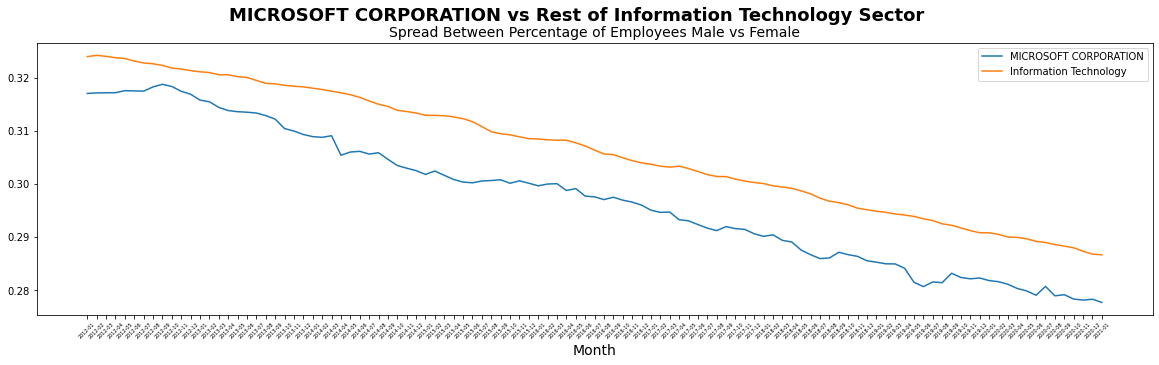

In [28]:
fig,ax = plt.subplots(figsize=(20,5))
x=com_month.loc[com_month['gender']=='male','spread']
z=sector_month.loc[sector_month['gender']=='male','spread']
x.plot.line(ax=ax,label=company)
z.plot.line(ax=ax,label=sector)

plt.suptitle(company+' vs Rest of '+sector+' Sector',size=18,fontweight='bold')
plt.title('Spread Between Percentage of Employees Male vs Female',size=14)
plt.xlabel('Month',size=14)

plt.xticks(com_month.loc[com_month['gender']=='male'].index,com_month.loc[com_month['gender']=='male','month'],size=5,rotation=45)

plt.legend()
plt.show()

## Interesting! We see that Microsoft does better than the sector in terms of having a lower spread. And overall, the company and the Information Technology sector are trending in the right direction towards equiality between the genders.

## The next question we wanted to explore is "What is the job makeup of the spread?". We know that the overall trend is that the spread is lowering so another way to ask the question is, "Which jobs have added more males than females?" And again, we started by filtering the data for the company, and then doing the same for the sector.

In [29]:
# Company Hiring Over Time
com_all = df.loc[df['company']==company,:]
com_split = com_all.groupby(['month','gender','job_category'])[['count']].sum().reset_index()
com_split


com_split['percentage'] = 0
com_split['end'] = 0         # Percentage change in employee count for each gender from beginning to end of data
for i in range(len(com_split)):
    com_split.loc[i,'percentage'] = com_split.loc[i,'count']/com_split.loc[(com_split['month']==com_split.loc[i,'month']) & (com_split['job_category']==com_split.loc[i,'job_category']),'count'].sum()
    com_split.loc[i,'end'] = float(com_split.loc[(com_split['month']==com_split['month'].max()) & (com_split['job_category']==com_split.loc[i,'job_category']) & (com_split['gender']==com_split.loc[i,'gender']),'count'])/float(com_split.loc[(com_split['month']==com_split['month'].min()) & (com_split['job_category']==com_split.loc[i,'job_category']) & (com_split['gender']==com_split.loc[i,'gender']),'count'])-1

com_split

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,3684.005177,0.531910,0.335354
1,2012-01,female,engineer,32001.730989,0.283336,0.779026
2,2012-01,female,finance,6173.481920,0.558494,0.342900
3,2012-01,female,management,26864.420199,0.338418,0.413847
4,2012-01,female,marketing,7310.310015,0.437954,0.319058
...,...,...,...,...,...,...
1739,2021-01,male,management,66348.732761,0.635945,0.263354
1740,2021-01,male,marketing,11675.654514,0.547680,0.244521
1741,2021-01,male,sales,31940.603128,0.612312,0.322820
1742,2021-01,male,scientist,5880.197481,0.552487,0.386616


In [30]:
end = com_split.loc[com_split['month']==com_split['month'].max(),:]
end['job_category'] = end['job_category'].str.capitalize()
end = end.set_index('job_category')

end

<ipython-input-30-4d6d710ab883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end['job_category'] = end['job_category'].str.capitalize()


,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,4919.452199,0.523650,0.335354
Engineer,2021-01,female,56931.897171,0.308786,0.779026
Finance,2021-01,female,8290.367964,0.568923,0.342900
Management,2021-01,female,37982.177935,0.364055,0.413847
Marketing,2021-01,female,9642.722500,0.452320,0.319058
Sales,2021-01,female,20223.363519,0.387688,0.573551
Scientist,2021-01,female,4762.938735,0.447513,0.381682
Technician,2021-01,female,5902.232550,0.358231,0.166247
Administrative,2021-01,male,4475.086883,0.476350,0.380352


## Now for the sector.

In [31]:
# Sector Hiring Over Time
sector_split = sector_df3.groupby(['month','gender','job_category'])[['count']].sum().reset_index()
sector_split


sector_split['percentage'] = 0
sector_split['end'] = 0         # Percentage change in employee count for each gender from beginning to end of data
for i in range(len(sector_split)):
    sector_split.loc[i,'percentage'] = sector_split.loc[i,'count']/sector_split.loc[(sector_split['month']==sector_split.loc[i,'month']) & (sector_split['job_category']==sector_split.loc[i,'job_category']),'count'].sum()
    sector_split.loc[i,'end'] = float(sector_split.loc[(sector_split['month']==sector_split['month'].max()) & (sector_split['job_category']==sector_split.loc[i,'job_category']) & (sector_split['gender']==sector_split.loc[i,'gender']),'count'])/float(sector_split.loc[(sector_split['month']==sector_split['month'].min()) & (sector_split['job_category']==sector_split.loc[i,'job_category']) & (sector_split['gender']==sector_split.loc[i,'gender']),'count'])-1

sector_split

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,39791.769487,0.531047,0.231818
1,2012-01,female,engineer,734103.061777,0.322552,0.376607
2,2012-01,female,finance,71875.866149,0.487891,0.155325
3,2012-01,female,management,325673.027543,0.336166,0.360205
4,2012-01,female,marketing,30983.966236,0.425261,0.333826
...,...,...,...,...,...,...
1739,2021-01,male,management,792466.066342,0.641440,0.232235
1740,2021-01,male,marketing,50595.516320,0.550414,0.208259
1741,2021-01,male,sales,252323.644796,0.649191,0.070329
1742,2021-01,male,scientist,27910.476728,0.469619,0.295023


In [32]:
sector_end = sector_split.loc[sector_split['month']==sector_split['month'].max(),:]
sector_end['job_category'] = sector_end['job_category'].str.capitalize()
sector_end = sector_end.set_index('job_category')
sector_end

<ipython-input-32-d1713d3666e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_end['job_category'] = sector_end['job_category'].str.capitalize()


,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,4.901621e+04,0.543847,0.231818
Engineer,2021-01,female,1.010572e+06,0.340553,0.376607
Finance,2021-01,female,8.304000e+04,0.475399,0.155325
Management,2021-01,female,4.429822e+05,0.358560,0.360205
Marketing,2021-01,female,4.132721e+04,0.449586,0.333826
Sales,2021-01,female,1.363506e+05,0.350809,0.208297
Scientist,2021-01,female,3.152170e+04,0.530381,0.427509
Technician,2021-01,female,3.239551e+04,0.284061,0.188390
Administrative,2021-01,male,4.111243e+04,0.456153,0.169995


## And now we build the graphs for the company.

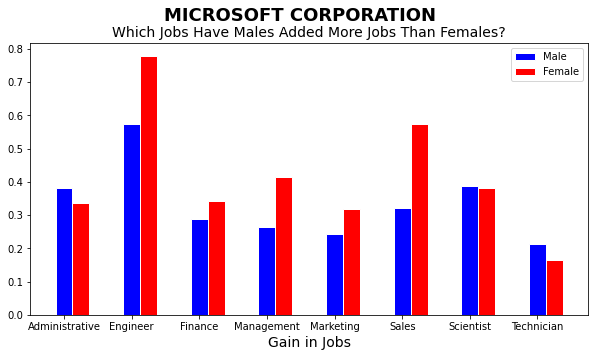

In [33]:
# Company Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = end.loc[end['gender']=='male','end']
bars2 = end.loc[end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(end.loc[end['gender']=='male',:].reset_index().index,end.loc[end['gender']=='male'].index,size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## Interesting! We see that Females were hired more in every job, with the exception of administrative and scientist.

## What does the sector look like? Lets's build the graph and take a look!

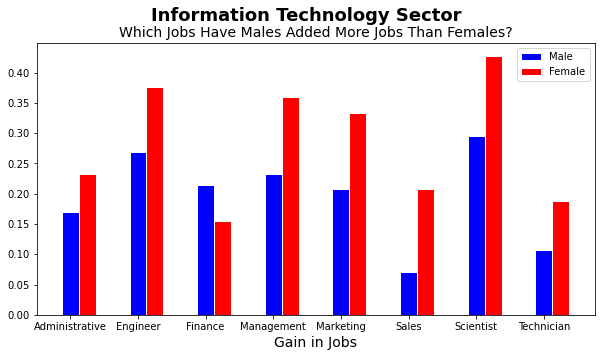

In [34]:
# Rest of Sector Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = sector_end.loc[sector_end['gender']=='male','end']
bars2 = sector_end.loc[sector_end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(sector+' Sector',size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(sector_end.loc[sector_end['gender']=='male',:].reset_index().index,sector_end.loc[sector_end['gender']=='male'].index,size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## We see that Finance is where Males have added more jobs than Females.

## Next, we looked at inflow of female changes over time, for Information Technology companies in North America, assuming inflow represents a firm acquiring new talents. To do this, we had to make changes to the dataset.

In [35]:
# remove empty
df = df.loc[df['region'] != 'empty']

In [36]:
df['year'] = pd.DatetimeIndex(df['month']).year
df['month_in_year'] = pd.DatetimeIndex(df['month']).month

In [37]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

In [38]:
# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Males
males = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'male') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

In [39]:
# Females inflow
female_inflow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean'})
                 .sort_values(['company','year']))

# Males inflow
male_inflow = (males.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean'})
                 .sort_values(['company','year']))

In [40]:
female_company = female_inflow['company'].unique()

In [41]:
max_inflow = female_inflow['inflow'].max()
min_inflow = female_inflow['inflow'].min()

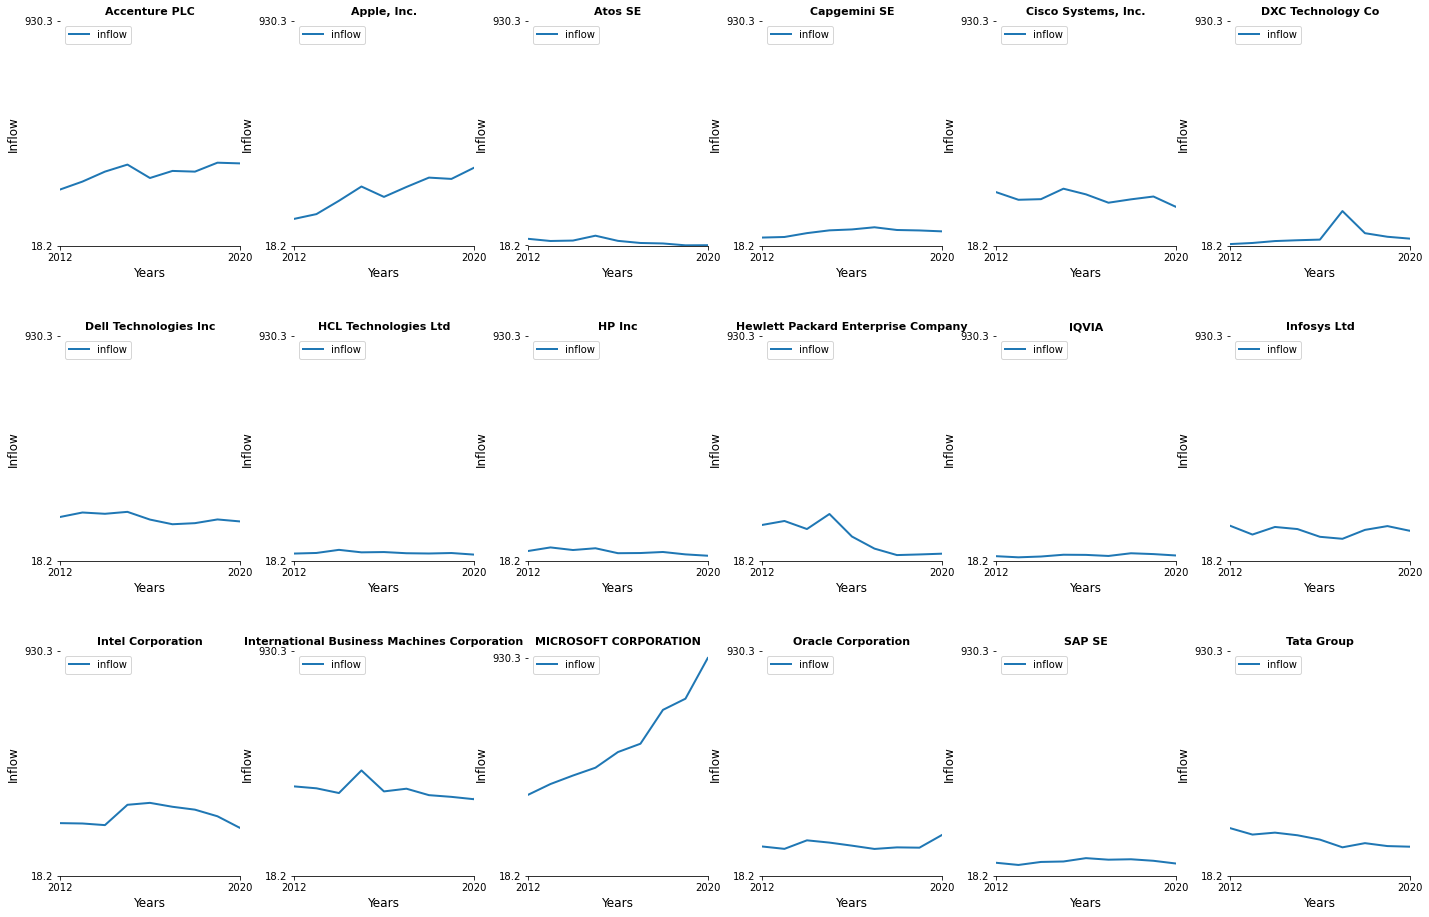

In [42]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_inflow = female_inflow.loc[female_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        ax[i][j].set_yticks([min_inflow, max_inflow])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

## Interesting, we see here Mircosoft has a high uptrend.

## Now we do the same for outflow, assuming that means a firms ability to retain talent.

In [43]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Females inflow
female_flow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean', 'outflow':'mean'})
                 .sort_values(['company','year']))

female_company = female_flow['company'].unique()

max_outflow = female_flow['outflow'].max()
min_outflow = female_flow['outflow'].min()

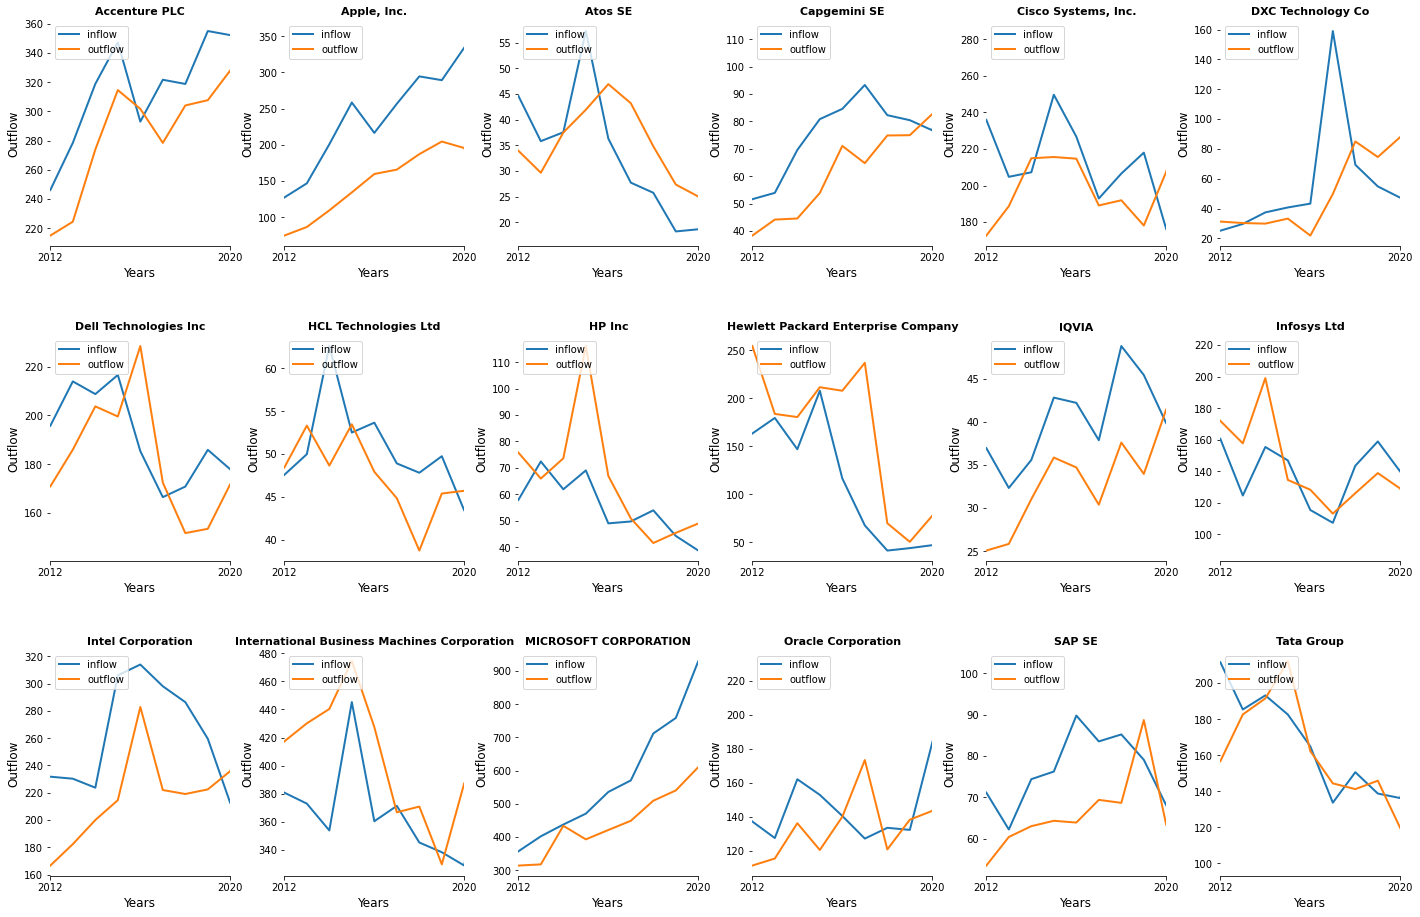

In [44]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):
        # Inflow
        df_female_inflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        # Outflow
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([min_outflow, max_outflow])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Outflow', size=12)
        c+=1

## Spikes in the inflow might represent a company expanding or developing R&D while a spike in outflow might mean a company struggling to retain its talent, restructuring or showing itself to be more competitive to shareholders¶

## The last thing we wanted to plot was the Male vs Female outflows and inflows. First we started with inflow.

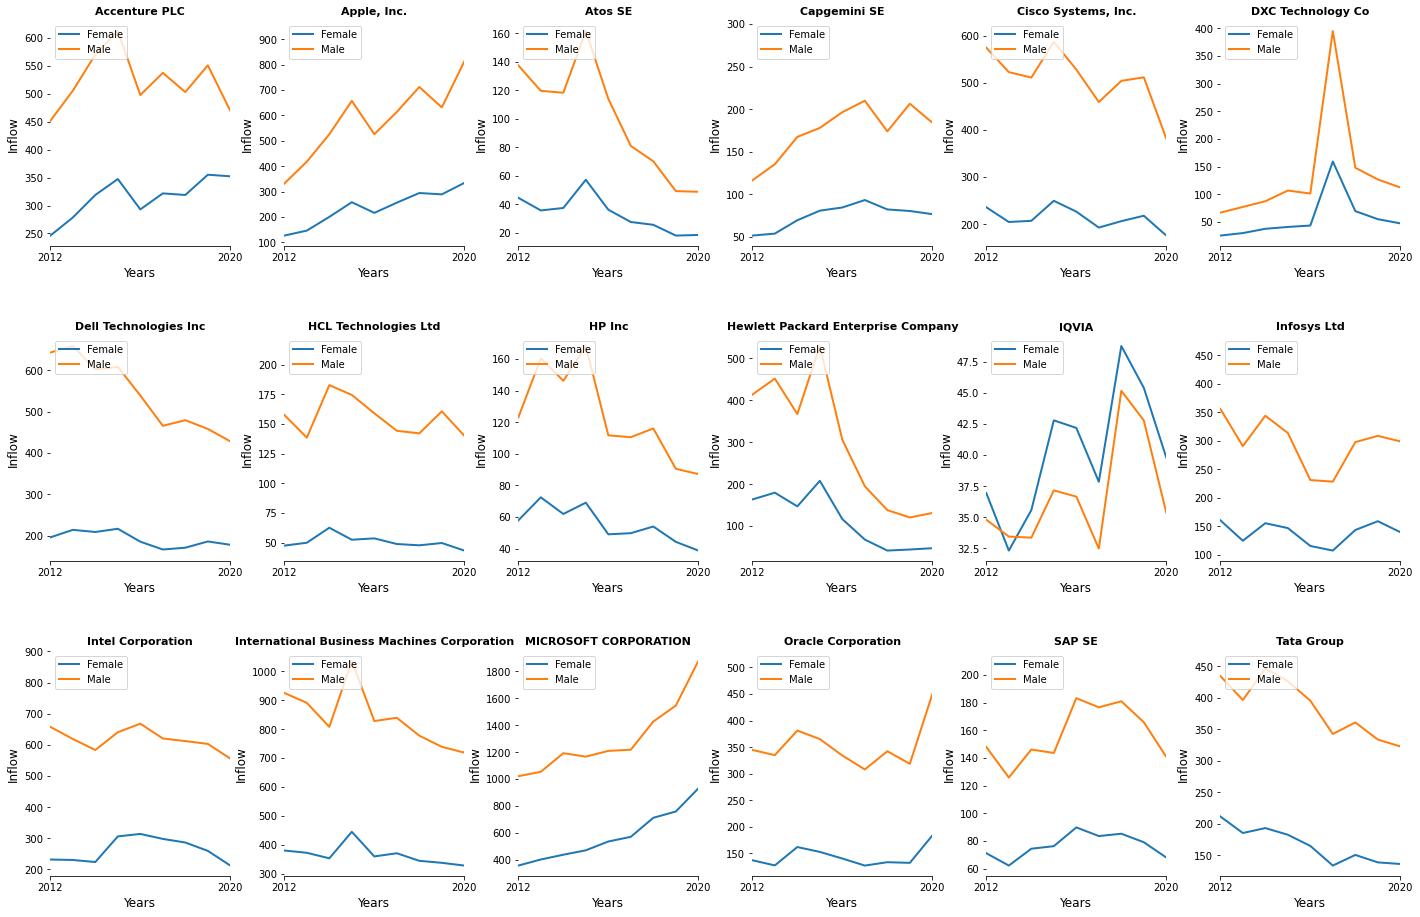

In [45]:
mf_max_inflow = max(female_inflow['inflow'].max(), male_inflow['inflow'].max())
mf_min_inflow = min(female_inflow['inflow'].min(), male_inflow['inflow'].min())

fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_inflow = female_inflow.loc[female_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        df_male_inflow = male_inflow.loc[male_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([mf_min_inflow, mf_max_inflow])
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

## Then we did the same for outflow.

In [46]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Males
males = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'male') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Females inflow
female_flow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean', 'outflow':'mean'})
                 .sort_values(['company','year']))

# Males inflow
male_flow = (males.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean','outflow':'mean'})
                 .sort_values(['company','year']))

female_company = female_flow['company'].unique()

mf_max_outflow = max(female_flow['outflow'].max(), male_flow['outflow'].max())
mf_min_outflow = min(female_flow['outflow'].min(), male_flow['outflow'].min())

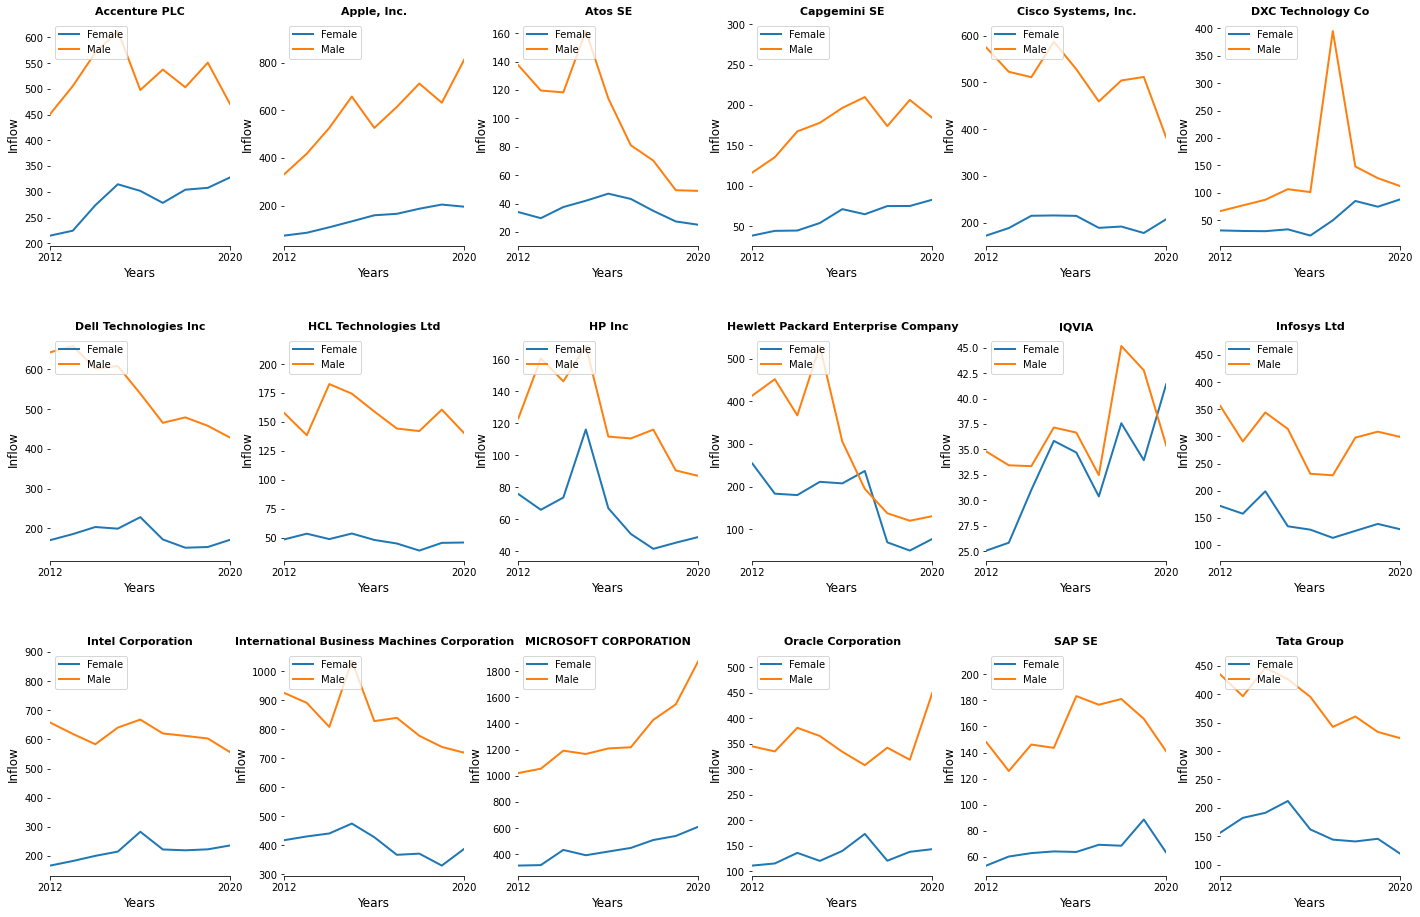

In [47]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        df_male_outflow = male_flow.loc[male_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_outflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([mf_min_inflow, mf_max_inflow])
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

## We can see that females are less likely to leave the firm as compared to males - However, IQVIA is interesting as Females are leaving more is this because of the enviroment or management?


## And that's our project! Hope you had as much fun as we did exploring the data!